In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from datetime import timedelta
from matplotlib import colors as mcolors
import matplotlib.dates as mdates
from model_utils import *

In [2]:
dir_path = "../geomagnetic_indices"
#year = 2021
#month = 5
filename = "geomagnetic-indices-2010-2020.txt"#"hourly-geomagnetic-indices-%02d-%d.txt" % (month, year)
filename = './' + dir_path + '/' + filename
#str_month = GetMonth(month)
#current_month = '%s-%d' % (str_month, year) 
dir_plots = 'Plots/' #% current_month

In [3]:
Data = pd.read_csv(filename,delimiter=r"\s+")#


In [4]:
def GetIndices(Data):
    YYYY = Data['Year']
    DD = Data['DayOfYear']
    hh = Data['Hour']
    fechas = []
    for Y, D, h in zip(YYYY, DD, hh):
        str_temp = '%d-%02d' % (Y,D) 
        fecha = datetime.datetime.strptime(str_temp,'%Y-%j')
        M = fecha.month
        D = fecha.day
        fecha = datetime.datetime(Y, M, D, h, 0, 0)
        fechas.append(fecha)
    dates = pd.to_datetime(fechas)

    return dates

In [5]:
indices = GetIndices(Data)
Data.set_index(indices)


,Year,DayOfYear,Hour,Kp,Dst,F107
2010-01-01 00:00:00,2010,1,0,0,5,72.7
2010-01-01 01:00:00,2010,1,1,0,4,72.7
2010-01-01 02:00:00,2010,1,2,0,4,72.7
2010-01-01 03:00:00,2010,1,3,0,2,72.7
2010-01-01 04:00:00,2010,1,4,0,0,72.7
...,...,...,...,...,...,...
2020-12-31 19:00:00,2020,366,19,0,3,78.5
2020-12-31 20:00:00,2020,366,20,0,6,78.5
2020-12-31 21:00:00,2020,366,21,3,4,78.5
2020-12-31 22:00:00,2020,366,22,3,3,78.5


In [6]:
print(Data['Kp'].shape)
print(Data['F107'].shape)

(96432,)
(96432,)


In [7]:
kp_series = pd.Series(Data['Kp'].values, index=indices)
F107_series = pd.Series(Data['F107'].values, index=indices)
Dst_series = pd.Series(Data['Dst'].values, index=indices)

moderate_lim = np.ones(Data['Kp'].shape)*100
F107_moderate = pd.Series(moderate_lim, index=indices)
high_lim = np.ones(Data['Kp'].shape)*150
F107_high = pd.Series(high_lim, index=indices)

In [8]:
F107_filtered = F107_series[F107_series<999.9]

/home/juanpablo/yes/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/home/juanpablo/yes/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


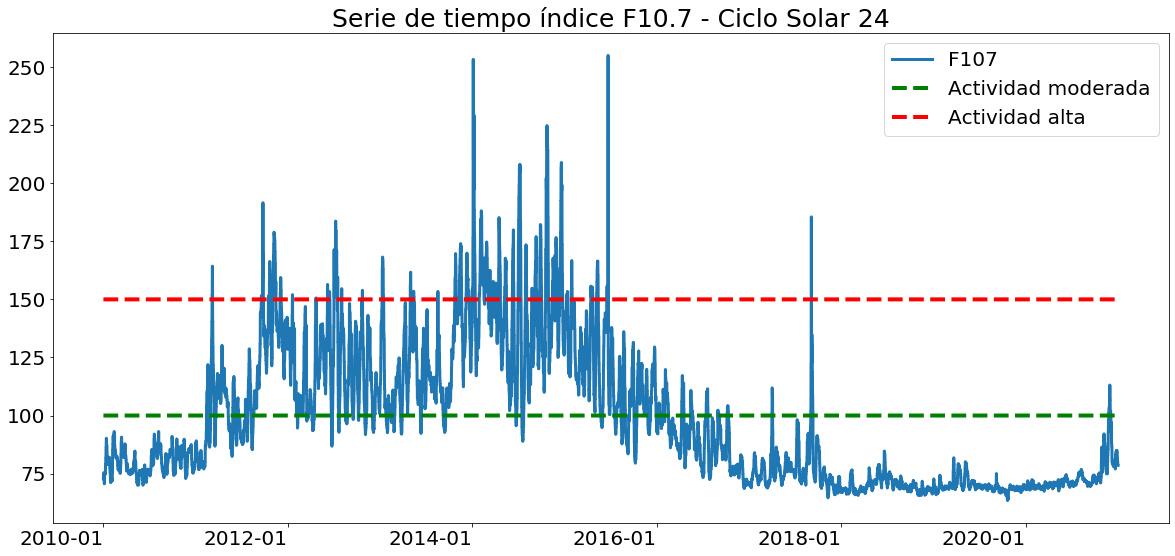

In [26]:
#F107_series.plot()
#fig = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(20,10))
ax=F107_filtered.plot(label='F107',lw=3)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x',labelsize=20)
ax.set_title('Serie de tiempo índice F10.7 - Ciclo Solar 24', fontsize=25)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
F107_moderate.plot(color='green', linestyle='dashed', label='Actividad moderada',lw=4)#, marker='--')
F107_high.plot(color='red', linestyle='dashed', label='Actividad alta',lw=4)#, marker='--')
plt.legend(fontsize=20)
plt.xticks(rotation = 0)
plt.savefig('indice-f107-ciclo-solar-24.png')

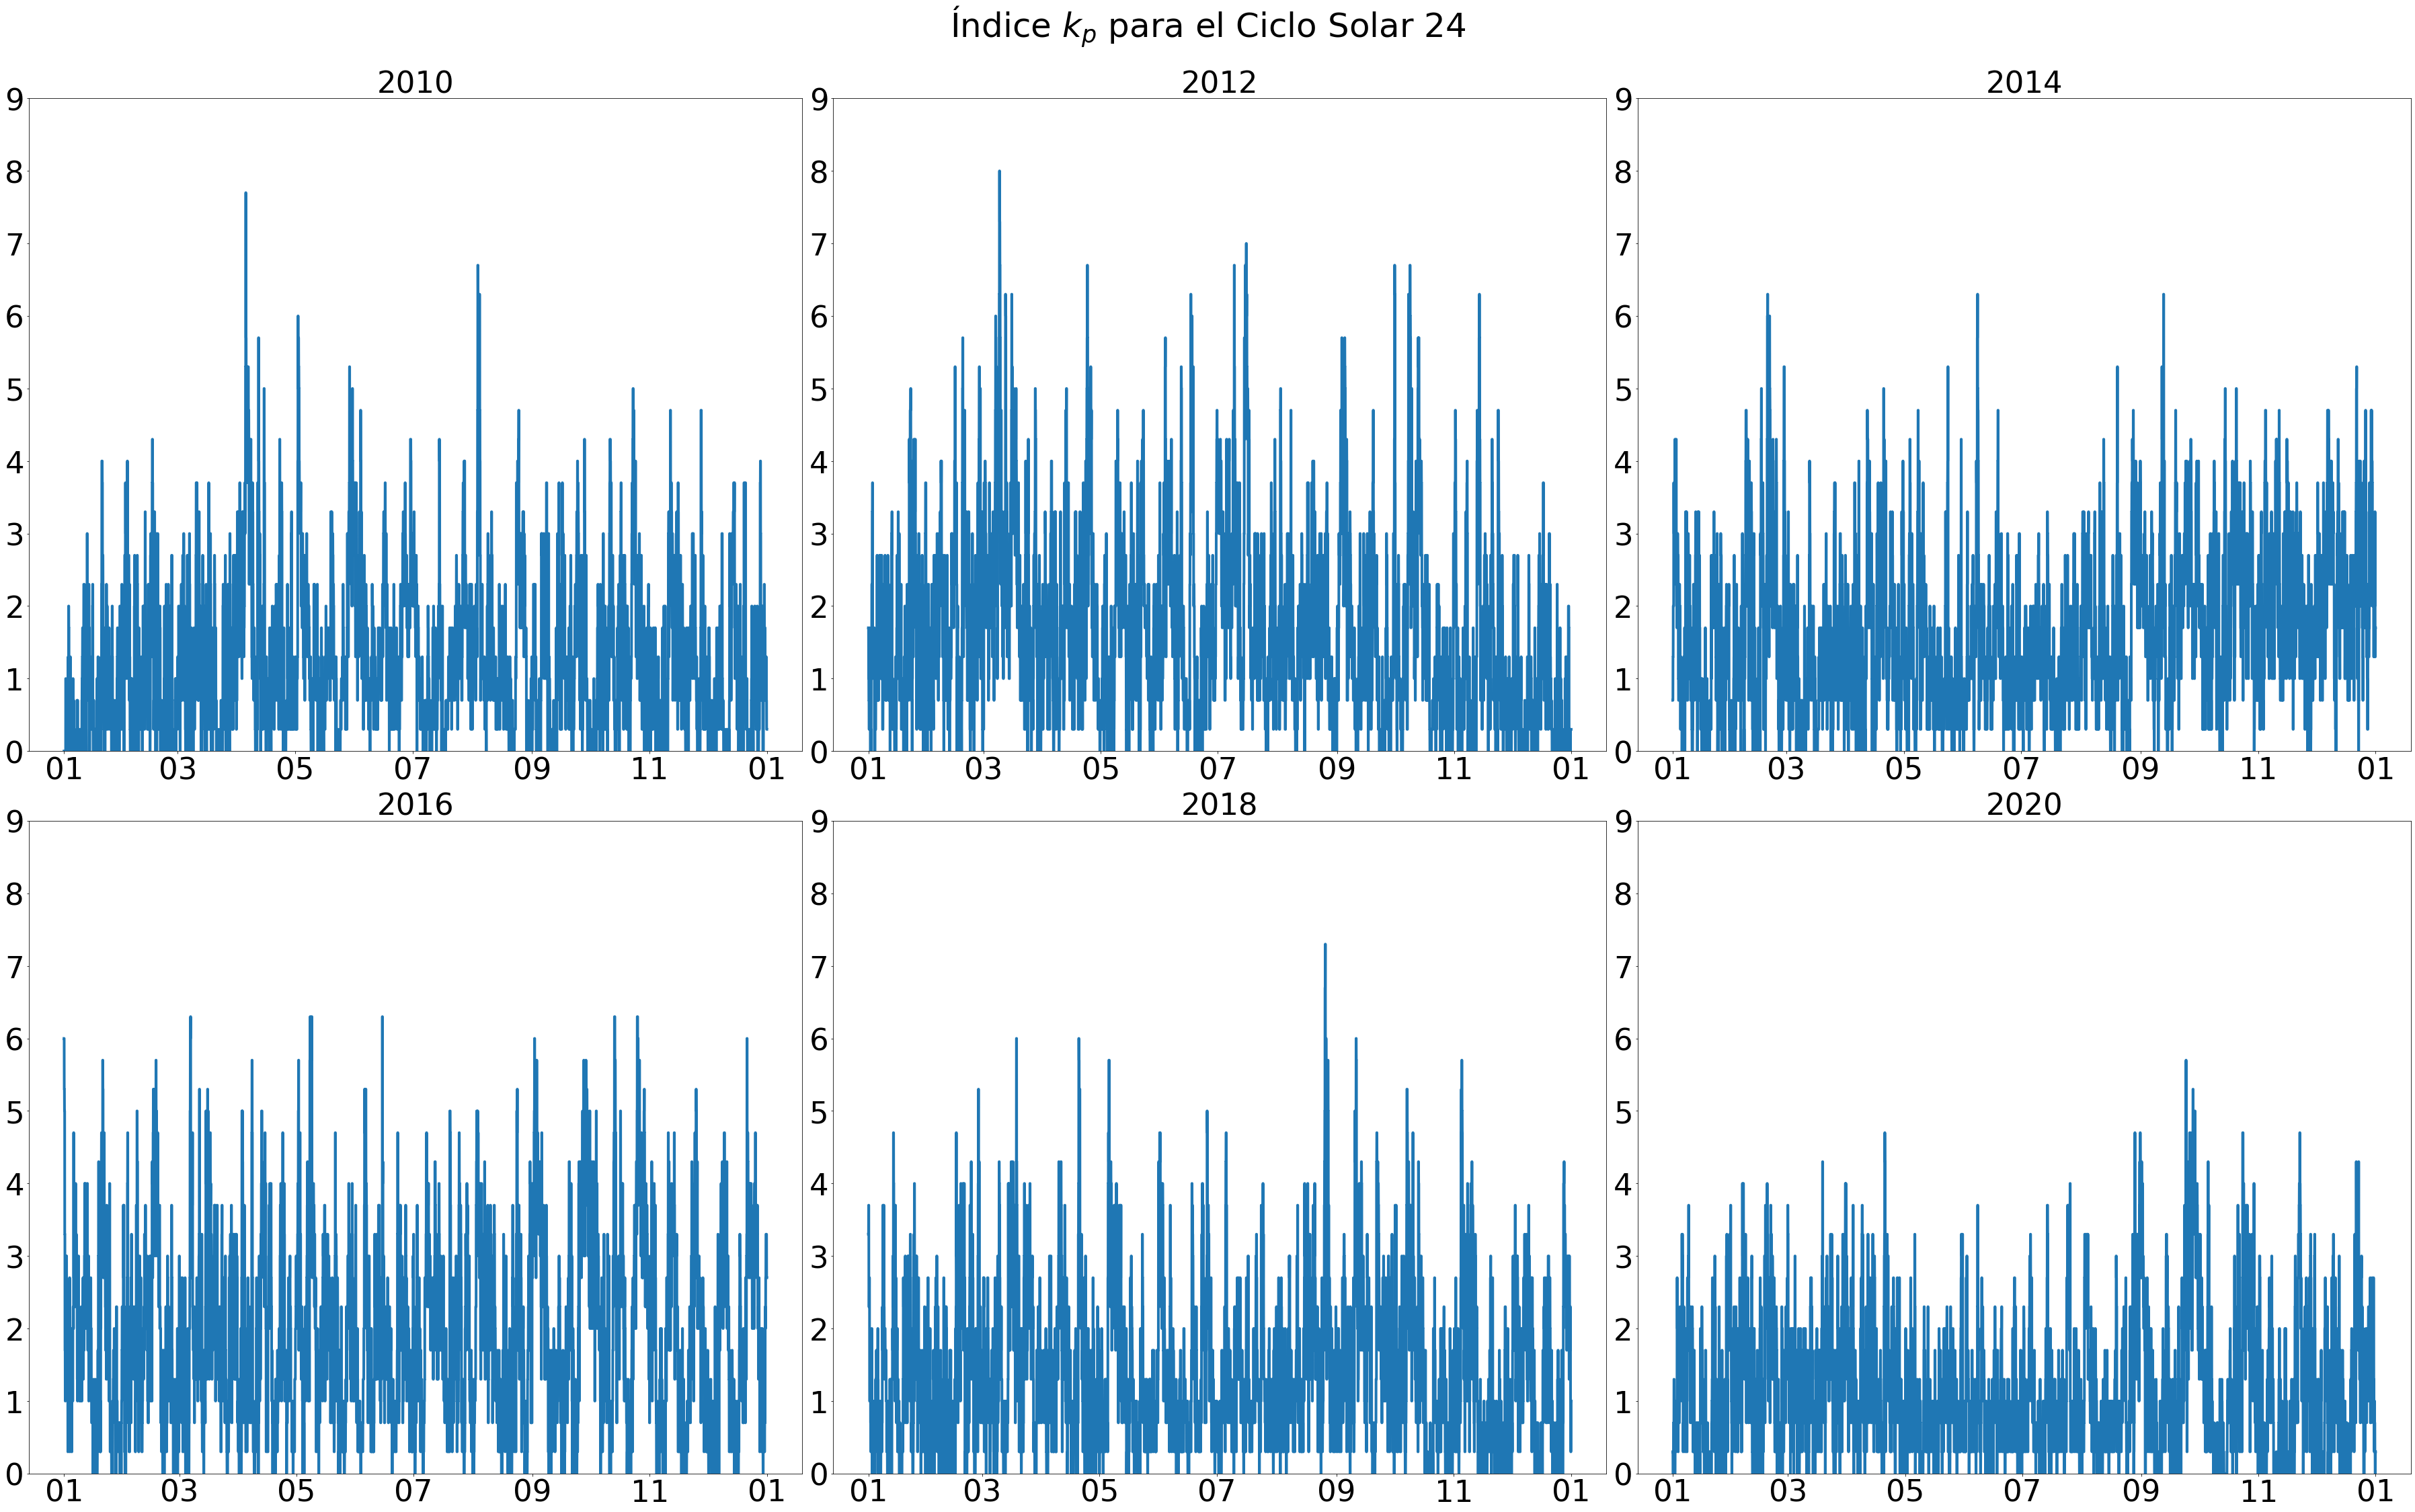

In [88]:
#fig = plt.subplots()
#(kp_series/10).plot()
myFmt = mdates.DateFormatter('%m')
ft=45
lw=4
figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(50,30))
figure.suptitle(r'Índice $k_p$ para el Ciclo Solar 24',  y=1.04,fontsize=50)
axes[0,0].plot(kp_series['2010-01-01':'2010-12-31'].index,kp_series['2010-01-01':'2010-12-31']/10,label='2010',lw=lw)
axes[0,0].set_title('2010', fontsize=ft)
axes[0,0].xaxis_date()
axes[0,0].set_ylim(0,9)
axes[0,0].xaxis.set_major_formatter(myFmt)
axes[0,0].tick_params(axis='y', labelsize=ft)
axes[0,0].tick_params(axis='x',labelsize=ft)
axes[0,1].plot(kp_series['2012-01-01':'2012-12-31'].index,kp_series['2012-01-01':'2012-12-31']/10,label='2012',lw=lw)
axes[0,1].set_title('2012', fontsize=ft)
axes[0,1].xaxis_date()
axes[0,1].set_ylim(0,9)
axes[0,1].xaxis.set_major_formatter(myFmt)
axes[0,1].tick_params(axis='y', labelsize=ft)
axes[0,1].tick_params(axis='x',labelsize=ft)
axes[0,2].plot(kp_series['2014-01-01':'2014-12-31'].index,kp_series['2014-01-01':'2014-12-31']/10,label='2014',lw=lw)
axes[0,2].set_title('2014', fontsize=ft)
axes[0,2].xaxis_date()
axes[0,2].set_ylim(0,9)
axes[0,2].xaxis.set_major_formatter(myFmt)
axes[0,2].tick_params(axis='y', labelsize=ft)
axes[0,2].tick_params(axis='x',labelsize=ft)
axes[1, 0].plot(kp_series['2016-01-01':'2016-12-31']/10,label='2016',lw=lw)
axes[1,0].set_title('2016', fontsize=ft)
axes[1,0].xaxis_date()
axes[1,0].set_ylim(0,9)
axes[1,0].xaxis.set_major_formatter(myFmt)
axes[1,0].tick_params(axis='y', labelsize=ft)
axes[1,0].tick_params(axis='x',labelsize=ft)
axes[1, 1].plot(kp_series['2018-01-01':'2018-12-31']/10,label='2018',lw=lw)
axes[1,1].set_title('2018', fontsize=ft)
axes[1,1].xaxis_date()
axes[1,1].set_ylim(0,9)
axes[1,1].xaxis.set_major_formatter(myFmt)
axes[1,1].tick_params(axis='y', labelsize=ft)
axes[1,1].tick_params(axis='x',labelsize=ft)
axes[1, 2].plot(kp_series['2020-01-01':'2020-12-31']/10,label='2020',lw=lw)
axes[1,2].set_title('2020', fontsize=ft)
axes[1,2].xaxis_date()
axes[1,2].set_ylim(0,9)
axes[1,2].xaxis.set_major_formatter(myFmt)
axes[1,2].tick_params(axis='y', labelsize=ft)
axes[1,2].tick_params(axis='x',labelsize=ft)
figure.tight_layout()
plt.savefig('kp-anual-ciclo-solar-24.png')

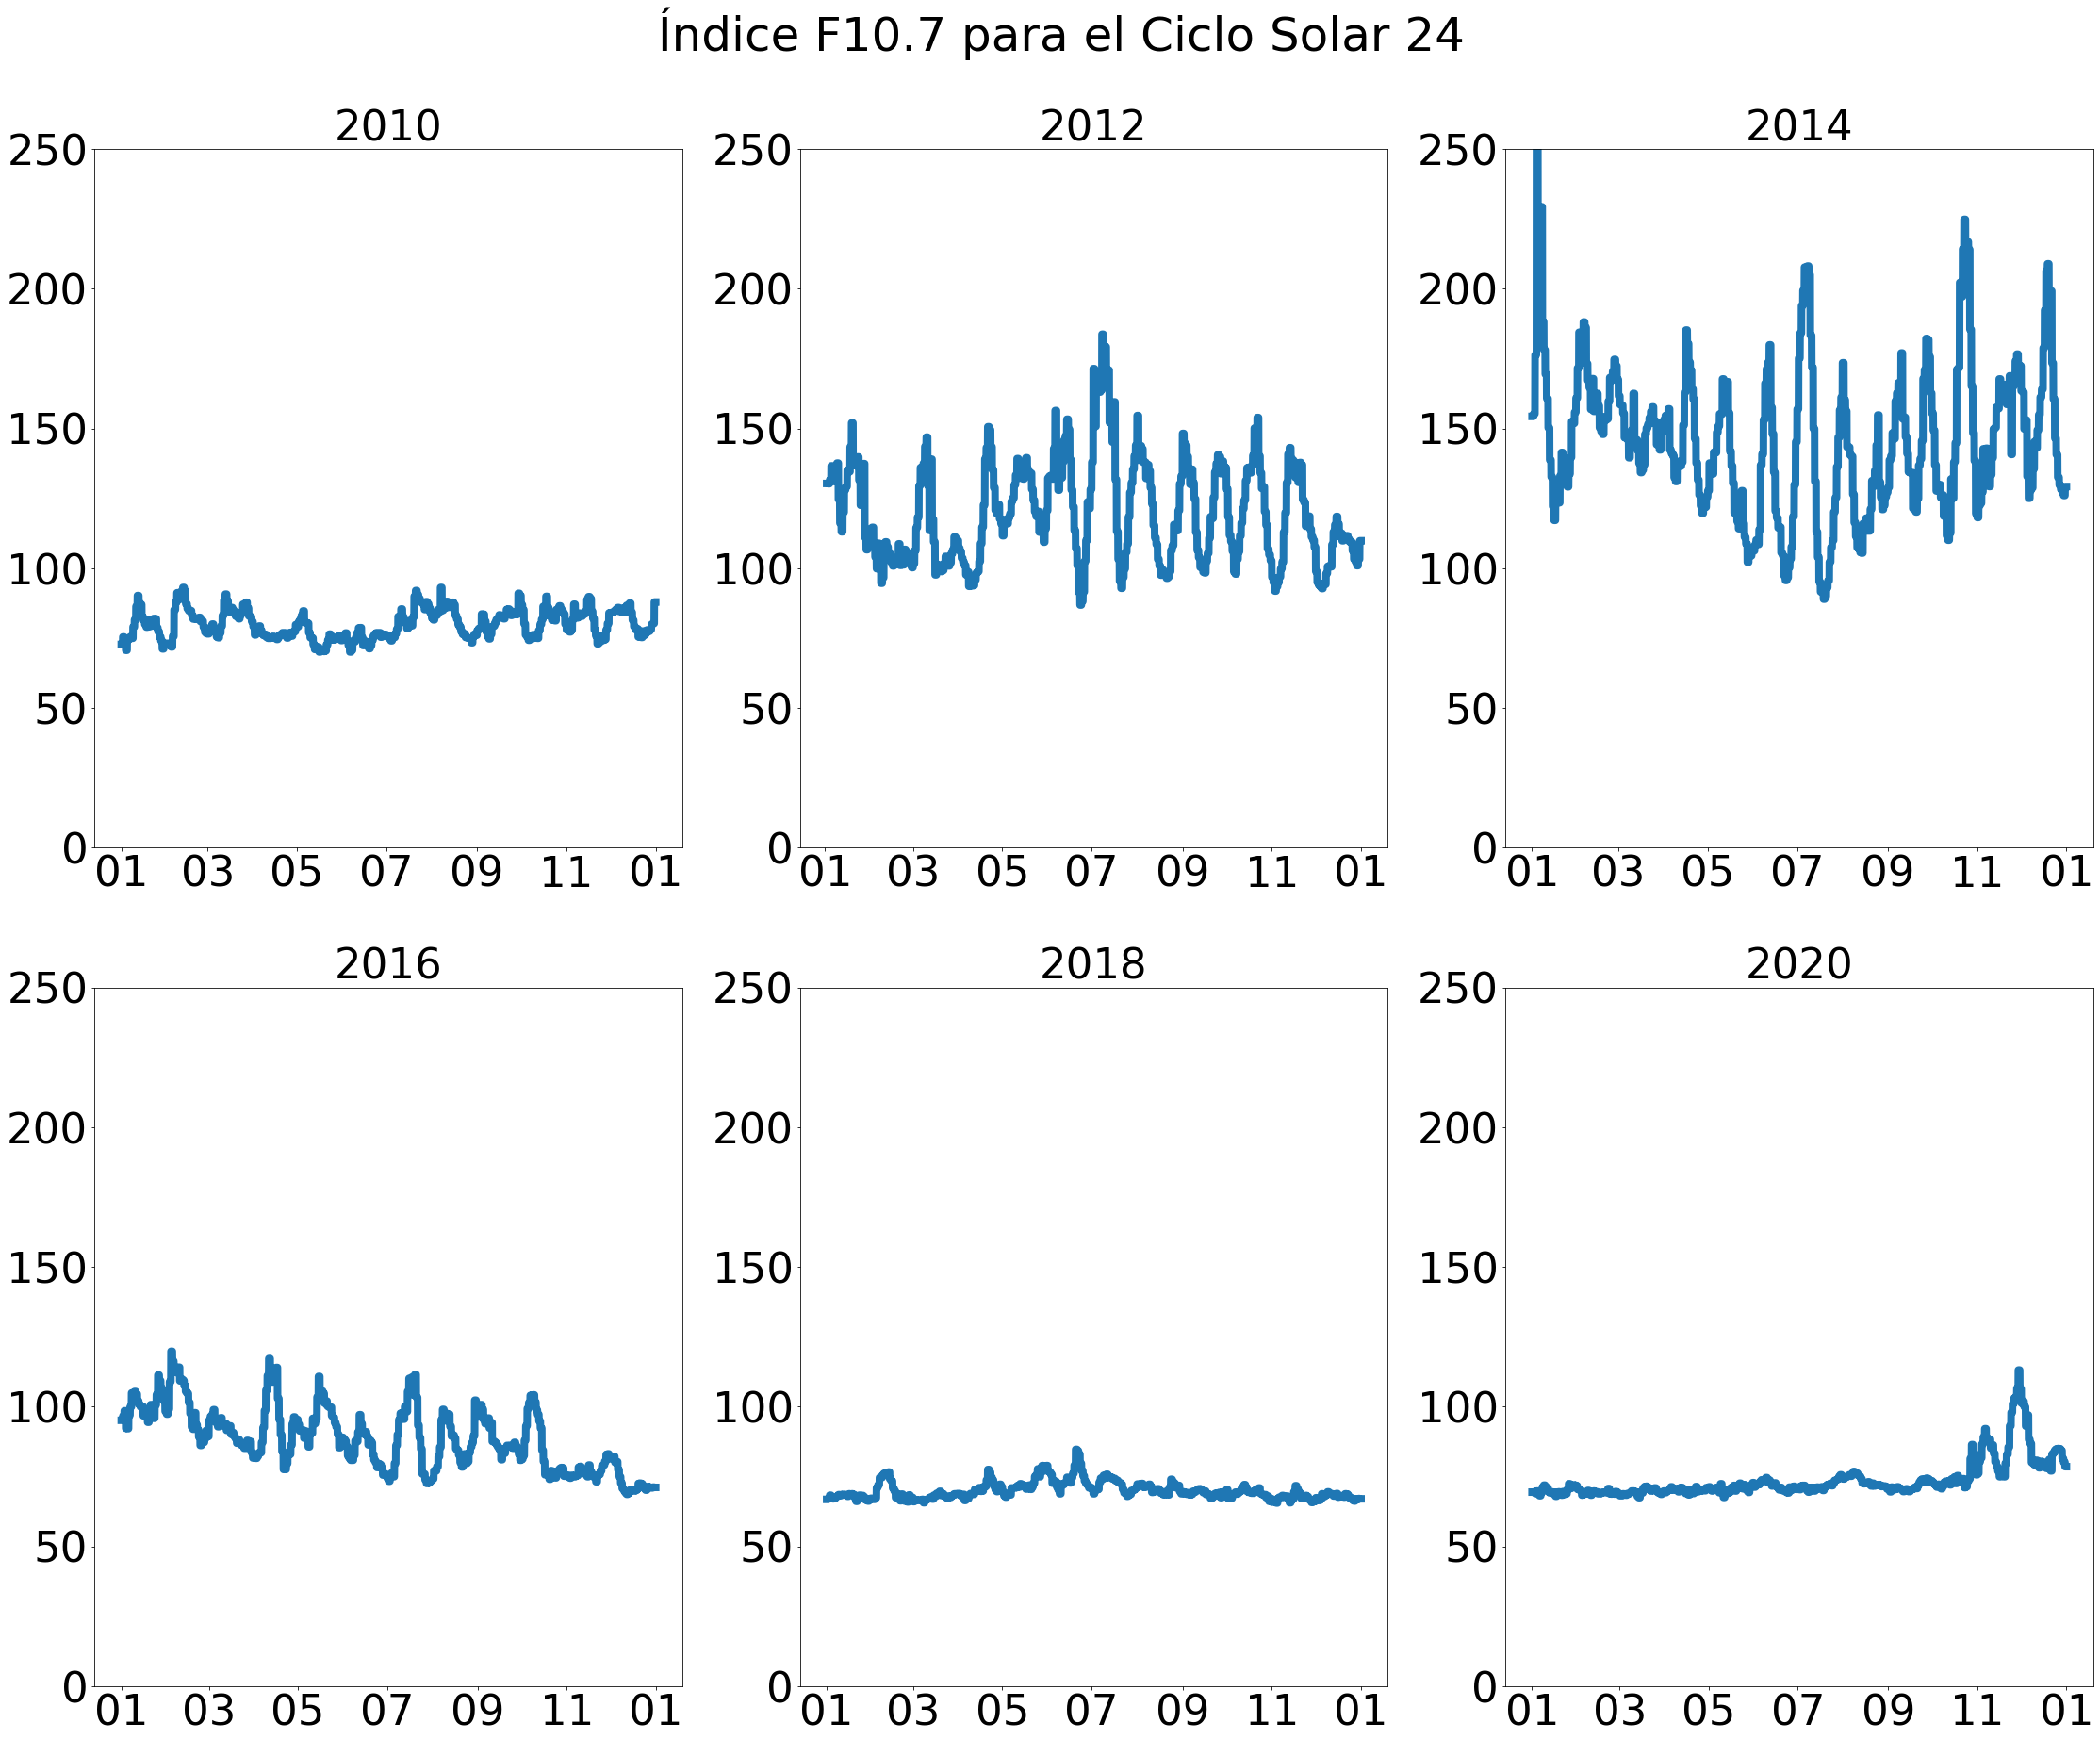

In [87]:
figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(38,30))
myFmt = mdates.DateFormatter('%m')
ft=45
lw=8
figure.suptitle(r'Índice F10.7 para el Ciclo Solar 24',  y=0.95,fontsize=50)
axes[0,0].plot(F107_filtered['2010-01-01':'2010-12-31'].index,F107_filtered['2010-01-01':'2010-12-31'],label='2010',lw=lw)
axes[0,0].set_title('2010', fontsize=ft)
axes[0,0].xaxis_date()
axes[0,0].set_ylim(0,250)
axes[0,0].xaxis.set_major_formatter(myFmt)
axes[0,0].tick_params(axis='y', labelsize=ft)
axes[0,0].tick_params(axis='x',labelsize=ft)
axes[0,1].plot(F107_filtered['2012-01-01':'2012-12-31'].index,F107_filtered['2012-01-01':'2012-12-31'],label='2012',lw=lw)
axes[0,1].set_title('2012', fontsize=ft)
axes[0,1].xaxis_date()
axes[0,1].set_ylim(0,250)
axes[0,1].xaxis.set_major_formatter(myFmt)
axes[0,1].tick_params(axis='y', labelsize=ft)
axes[0,1].tick_params(axis='x',labelsize=ft)
axes[0,2].plot(F107_filtered['2014-01-01':'2014-12-31'].index,F107_filtered['2014-01-01':'2014-12-31'],label='2014',lw=lw)
axes[0,2].set_title('2014', fontsize=ft)
axes[0,2].xaxis_date()
axes[0,2].set_ylim(0,250)
axes[0,2].xaxis.set_major_formatter(myFmt)
axes[0,2].tick_params(axis='y', labelsize=ft)
axes[0,2].tick_params(axis='x',labelsize=ft)
axes[1, 0].plot(F107_filtered['2016-01-01':'2016-12-31'],label='2016',lw=lw)
axes[1,0].set_title('2016', fontsize=ft)
axes[1,0].xaxis_date()
axes[1,0].set_ylim(0,250)
axes[1,0].xaxis.set_major_formatter(myFmt)
axes[1,0].tick_params(axis='y', labelsize=ft)
axes[1,0].tick_params(axis='x',labelsize=ft)
axes[1, 1].plot(F107_filtered['2018-01-01':'2018-12-31'],label='2018',lw=lw)
axes[1,1].set_title('2018', fontsize=ft)
axes[1,1].xaxis_date()
axes[1,1].set_ylim(0,250)
axes[1,1].xaxis.set_major_formatter(myFmt)
axes[1,1].tick_params(axis='y', labelsize=ft)
axes[1,1].tick_params(axis='x',labelsize=ft)
axes[1, 2].plot(F107_filtered['2020-01-01':'2020-12-31'],label='2020',lw=lw)
axes[1,2].set_title('2020', fontsize=ft)
axes[1,2].xaxis_date()
axes[1,2].set_ylim(0,250)
axes[1,2].xaxis.set_major_formatter(myFmt)
axes[1,2].tick_params(axis='y', labelsize=ft)
axes[1,2].tick_params(axis='x',labelsize=ft)
plt.savefig('f107-anual-ciclo-solar-24.png')

In [ ]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
#for i, name in enumerate(sorted_names):
    #print(i, name)
    
print(sorted_names[0])
print(F107_series.index)

In [ ]:
low_kp =  kp_series[kp_series<35]#np.where(kp_series <2.5,kp_series)#[kp if kp < 35 for kp in kp_series.values]
#moderate_kp =  [kp if kp > 35 and kp<45 for kp in kp_series.values]
moderate_kp = kp_series.loc[(kp_series>35) & (kp_series<45)]
high_kp = kp_series[kp_series>=45]
print(low_kp.shape, high_kp.shape, moderate_kp.shape, kp_series.shape)
low_per = 100*low_kp.shape[0]/ kp_series.shape[0]
mod_per = 100*moderate_kp.shape[0]/ kp_series.shape[0]
high_per = 100*high_kp.shape[0]/ kp_series.shape[0]
print("Baja, moderada y alta:", low_per, mod_per, high_per)
mean_kp = kp_series.mean()
print("Kp promedio mensual: ", mean_kp)

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:green'
ax1.set_xlabel('Días', fontsize=20)
#ax1.set_ylabel('Kpx10', color=color,fontsize=20)
ax1.set_ylabel('Kpx10',fontsize=20)

lns1 = ax1.plot(kp_series,color=color, label=r'$K_p$')#.plot()
ax1.tick_params(axis='y', labelcolor=sorted_names[0],labelsize=20)
ax1.tick_params(axis='x',labelsize=20)
#ax1.format_xdata = mdates.DateFormatter('%m-%d')
#ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(0,90)
#ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax1.tick_params(axis='y',labelsize=18)
x_i = mdates.date2num(F107_series.index[0])
x_f = mdates.date2num(F107_series.index[-1])
ax1.set_xlim(x_i,x_f)
#ax1.arrow(x_i, 100, 1, 0, head_width=0.05, head_starts_at_zero=False)
ax1.annotate('T', xy=(x_i, 40), xytext=(x_i+1, 40),fontsize=18,color='green',
            arrowprops=dict(facecolor='green', shrink=0.01),
            )
#mask1 = y < 0.5
#mask2 = y >= 0.5

#plt.bar(x[mask1], y[mask1], color = 'red')
#mask1 = y < 0.5

#ax1.annotate('A', xy=(x_i, 50), xytext=(x_i+1, 50),fontsize=18,color='red',
            #arrowprops=dict(facecolor='red', shrink=0.01),
#            )
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#color = 'C0'

#ax2.set_ylabel('F10.7',color=color, fontsize=18)
ax2.set_ylabel('F10.7', fontsize=18)

#F107_series.plot()  # we already handled the x-label with ax1
lns2 = ax2.plot(F107_series,color='black',label='F10.7')
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color,labelsize=18)
ax2.tick_params(axis='y',labelsize=18)

ax2.xaxis.set_major_locator(plt.MaxNLocator(8))
#plt.title(r'Daily Averaged $Kp\times10$ and $F10.7$ Indices %s) ' %current_month, fontsize=15)
plt.title(r'Índices $Kp\times10$ y $F10.7$', fontsize=22)
#ax2.format_xdata mask1 = y < 0.5
#mask2 = y >= 0.5

#|plt.bar(x[mask1], y[mask1], color = 'red')
#plt.bar(x[mask2], y[mask2], color = 'blue')= 
#mdates.DateFormatter('%m-%d')
ax2.xaxis.set_major_formatter(myFmt)
ax2.set_ylim(50,250)
#F107_limit.plot()
#ax3 = ax1.twinx()
#ax3.arrow(20, 100, -1, 0, head_width=0.8, head_starts_at_zero=False) 
#ax3.get_yaxis().set_visible(False)
#F107_moderate.plot(color='green', linestyle='dashed')#, marker='--')
#F107_high.plot(color='red', linestyle='dashed')#, marker='--')
#ax1.text(0, 2.1, 'head_starts_at_zero=False')
ax2.annotate('M', xy=(x_f, 100), xytext=(x_f-2, 100),fontsize=18,color='green',
            arrowprops=dict(facecolor='green', shrink=0.01),
            )
ax2.annotate('A', xy=(x_f, 150), xytext=(x_f-2, 150),fontsize=18,color='red',
            arrowprops=dict(facecolor='red', shrink=0.01),
            )
#ax3 = ax1.twinx()
#color = 'tab:green'
#ax3.set_ylabel('F10.7=3.5',color=color, fontsize=15)
#F107_series.plot()  # we already handled the x-label with ax1
#ax3.plot(F107_limit,'g')#,label='F10.7')
#ax2.plot(t, data2, color=color)
#ax3.tick_params(axis='y', labelcolor=color,labelsize=15)
#ax3.xaxis.set_major_locator(plt.MaxNLocator(8))
#plt.axhline(y=36.5, color='b', linestyle='-')
plt.rc('legend',fontsize=15)
plt.grid(True)

leg = lns1 + lns2 #+ ln3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#fig_name = dir_plots + "geomagnetic-activity-indices-%s.png" % current_month
#plt.savefig(fig_name)
#fig_name_pdf = dir_plots + "geomagnetic-activity-indices-%s.pdf" % current_month
#plt.savefig(fig_name_pdf)


In [ ]:
import matplotlib as mpl

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.image as image
fig, ax1 = plt.subplots(1,1,figsize=(10,6))

im = image.imread('marker-kp.png')
imageSize = im.shape[1], im.shape[0]
dpi = 72
#line, = ax.plot((1,2,3,4),(1,2,3,4),"bo",mfc="None",mec="None",markersize=imageSize[0] * (dpi/ 96))

color = 'tab:green'
ax1.set_xlabel('Días', fontsize=20)
ax1.set_ylabel('Kp',fontsize=20)

clrs0 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in kp_series.values]
 
lsn1 = ax1.bar(kp_series.index,kp_series/10,color=clrs0,width=0.03,label=r'$K_p$')#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax1.set_yticks(kp_labels)

ax1.set_ylim(0,9)
ax1.get_yticklabels()[0].set_color("green")
ax1.get_yticklabels()[1].set_color("green")
ax1.get_yticklabels()[2].set_color("green")
ax1.get_yticklabels()[3].set_color("green")
ax1.get_yticklabels()[4].set_color("orange")
ax1.get_yticklabels()[5].set_color("red")
ax1.get_yticklabels()[6].set_color("red")
ax1.get_yticklabels()[7].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
ax1.get_yticklabels()[9].set_color("red")
'''
line, = lns1
ax1.tick_params(axis='x',labelsize=20)
line._transform_path()
path, affine = line._transformed_path.get_transformed_points_and_affine()
path = affine.transform_path(path)
for pixelPoint in path.vertices:
    # place image at point, centering it
    fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")
'''
myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y',labelsize=18)
x_i = mdates.date2num(F107_series.index[0])
x_f = mdates.date2num(F107_series.index[-1])
ax1.set_xlim(x_i,x_f)
cmap = mpl.colors.ListedColormap(['green', 'yellow','red'])
bounds = [0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#fig = ax.get_figure()
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(kp_series.values)   # TODO: Or what???
#fig.colorbar(mappable, ax=ax1,ticks=bounds)
#plt.grid(True)
ax1.grid(which='major', axis='y', linestyle='-')
#ax1.set_ylabel('F10.7', fontsize=18)

#ax1.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#color = 'C0'

#ax2.set_ylabel('F10.7',color=color, fontsize=18)
ax2.set_ylabel('F10.7', fontsize=18)

#F107_series.plot()  # we already handled the x-label with ax1
#lsn2 = ax2.plot(F107_series,label='F10.7',color='black',lw=4)
lsn2 = ax2.plot(F107_filtered,label='F10.7',color='black',lw=4)
#F107_filtered
f107_labels = [50,75,100,125,150,175,200,225,250]
ax2.set_ylim(50,250)
ax2.set_yticklabels(f107_labels)
ax2.get_yticklabels()[0].set_color("green")
ax2.get_yticklabels()[1].set_color("green")
ax2.get_yticklabels()[2].set_color("orange")
ax2.get_yticklabels()[3].set_color("orange")
ax2.get_yticklabels()[4].set_color("red")
ax2.get_yticklabels()[5].set_color("red")
ax2.get_yticklabels()[6].set_color("red")
ax2.get_yticklabels()[7].set_color("red")
ax2.get_yticklabels()[8].set_color("red")
ax2.tick_params(axis='y',labelsize=18)
ax2.xaxis.set_major_formatter(myFmt)
#ax2.xaxis.set_major_locator(plt.MaxNLocator(8))
#plt.title(r'Daily Averaged $Kp\times10$ and $F10.7$ Indices %s) ' %current_month, fontsize=15)
plt.title(r'Índices $K_p$ y $F10.7$', fontsize=22)
#plt.title(r'Índices $Kp\times10$ y $F10.7$', fontsize=22)

#ax2.format_xdata = mdates.DateFormatter('%m-%d')
#ax2.xaxis.set_major_formatter(myFmt)
ax2.set_ylim(50,250)
#ax2.grid(True)
bounds = np.array([0,40,90])#[0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
  

plt.rc('legend',fontsize=15)

##labs = [l.get_label() for l in leg]
#leg = lns1 + lns2 #+ ln3
#labs = [r'$k_p$','F10.7']#l.get_label() for l in leg]
#labs = ['F10.7']
#print(lns1.get_label())
#rint(lns2[0])
#ax1.legend(leg,labs)
#ax1.legend(labs)

leg = lns1 + lns2 #+ ln3
#labs.get_lines()[0].set_linewidth(10)

labs = [l.get_label() for l in leg]
#leg[0].get_lines()[0].set_linewidth(10)
plt.setp(leg[0], linewidth=10)

ax1.legend(leg, labs, loc=0)
#ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)

#ax2.legend(labs[1])
#fig.colorbar(mappable, ax=ax2,ticks=bounds)
fig_name = dir_plots + "geomagnetic-activity-indices-%s-prima.png" % current_month
plt.savefig(fig_name)
fig_name_pdf = dir_plots + "geomagnetic-activity-indices-%s-prima.pdf" % current_month
plt.savefig(fig_name_pdf)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

# constant
dpi = 72
# read in our png file
im = image.imread('marker-kp.png')
imageSize = im.shape[1], im.shape[0]

fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(111)
# plot our line with transparent markers, and markersize the size of our image
line, = ax.plot((1,2,3,4),(1,2,3,4),"bo",mfc="None",mec="None",markersize=imageSize[0] * (dpi/ 96))
# we need to make the frame transparent so the image can be seen
# only in trunk can you put the image on top of the plot, see this link:
# http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg14534.html
ax.patch.set_alpha(0)
ax.set_xlim((0,5))
ax.set_ylim((0,5))

# translate point positions to pixel positions
# figimage needs pixels not points
line._transform_path()
path, affine = line._transformed_path.get_transformed_points_and_affine()
path = affine.transform_path(path)
for pixelPoint in path.vertices:
    # place image at point, centering it
    fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")
plt.savefig('test-customized-markers.png')
plt.show()